# Trabalho Prático 1 - Classificação de Exoplanetas

Disciplina: Aprendizado de Máquina

Aluno: Danilo Pimentel de Carvalho Costa

Matrícula: 2016058077

## Carregando os dados

A função abaixo carrega o conjunto de dados, e utiliza memoização para evitar o carregar mais de uma vez. A memoização serve também para utilizar sempre a mesma divisão de dados de treino e teste para todos os modelos avaliados.

In [2]:
import pandas as pd
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

koi_data_mem = { 'loaded': False, 'mem': [None, None, None, None, None, None] }
def load_koi_data():
    if koi_data_mem['loaded']:
        X, y, X_train, X_test, y_train, y_test = koi_data_mem['mem']
        return X, y, X_train, X_test, y_train, y_test

    koi = pd.read_csv('koi_data.csv')

    X = koi.drop(['kepoi_name', 'koi_disposition'], axis=1)

    y = koi['koi_disposition']
    y = label_binarize(y, classes=['FALSE POSITIVE', 'CONFIRMED'], )
    y = y.ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    koi_data_mem['mem'][0] = X
    koi_data_mem['mem'][1] = y
    koi_data_mem['mem'][2] = X_train
    koi_data_mem['mem'][3] = X_test
    koi_data_mem['mem'][4] = y_train
    koi_data_mem['mem'][5] = y_test
    koi_data_mem['loaded'] = True

    return X, y, X_train, X_test, y_train, y_test

## Informações sobre o conjunto de dados

In [2]:
from IPython.display import display, Markdown
import numpy as np

X, y, X_train, X_test, y_train, y_test = load_koi_data()

kois_count = len(y)
feat_count = len(X.columns)
pos_count = np.count_nonzero(y == 1)
neg_count = np.count_nonzero(y == 0)

display(Markdown('**Número de KOIs**: ' + str(kois_count)))
display(Markdown('**Número de características disponíveis**: ' + str(feat_count)))
display(Markdown('Número de KOIs **positivos** para exoplaneta: ' + str(pos_count) + ' (' + str(pos_count / kois_count) + '%)'))
display(Markdown('Número de KOIs **negativos** para exoplaneta: ' + str(neg_count) + ' (' + str(neg_count / kois_count) + '%)'))

display(X)

**Número de KOIs**: 5202

**Número de características disponíveis**: 41

Número de KOIs **positivos** para exoplaneta: 2104 (0.4044598231449443%)

Número de KOIs **negativos** para exoplaneta: 3098 (0.5955401768550558%)

,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,koi_incl,koi_teq,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,89.66,793.0,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,89.57,443.0,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,67.09,1395.0,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,85.41,1406.0,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,60.92,1342.0,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,373.89398,0.963,27.66000,730.0,0.03288,0.00771,2.51,0.8885,88.57,206.0,...,-1.000,-0.300,0.00060,0.00030,2.360,-0.990,2.550,2.370,-0.910,2.540
5198,8.58987,0.765,4.80600,87.7,0.00936,0.18863,1.11,0.0779,85.14,929.0,...,1.100,1.200,-0.00008,-0.00010,1.260,-1.200,1.750,1.350,-1.300,1.840
5199,0.52770,1.252,3.22210,1579.2,0.29763,0.16318,29.35,0.0128,20.78,2088.0,...,0.792,-0.484,-0.00024,0.00018,2.132,-1.757,2.763,2.344,-1.756,2.929
5200,0.68140,0.147,0.86500,103.6,0.00944,8.97692,1.07,0.0157,88.60,2218.0,...,7.200,-5.600,-0.00072,0.00050,3.410,-3.650,5.000,3.380,-3.890,5.160


## Visualização do conjunto de dados

Abaixo, PCA é utilizado para análise de componentes principais, reduzinddo a dimensão dos dados de 41 para 3 características, para que possamos visualizar a distribuição graficamente.

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(X)
transformed_X = pd.DataFrame(pca.transform(X))

def plot_3d_scatter(data, color):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[0], data[1], data[2], c=color)
    plt.show()

### Dados negativos

Abaixo, podemos ver como os dados negativos estão distribuídos. Podemos ver que os pontos se aglomeram no canto inferior esquerdo. Observamos também a presença de alguns outliers nas direções opostas à aglomeração em cada eixo.

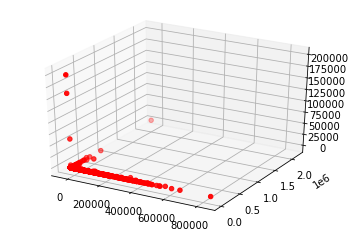

In [4]:
plot_3d_scatter(transformed_X.loc[y == 0], 'red')

### Dados positivos

Vemos abaixo também como os dados negativos estão distribuídos. Podemos ver que os pontos também se aglomeram no canto inferior esquerdo assim como a maioria dos negativos. Não são observadas grandes variações nas posições dos pontos azuis.

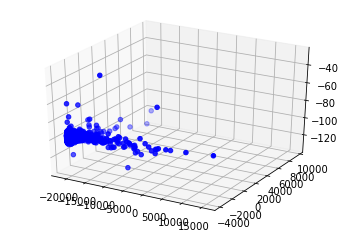

In [5]:
plot_3d_scatter(transformed_X.loc[y == 1], 'blue')

### Como negativos e positivos se distribuem

Abaixo, o gráfico mostra os pontos positivos e negativos limitando a escala para analisarmos como os pontos negativos se misturam aos pontos positivos. Podemos ver que pontos negativos estão menos concentrados que os pontos positivos. Isso são boas notícias, pois poderemos separar pontos negativos **muito** distantes dos positivos facilmente. Continuando a investigação, gostaríamos de analisar a fronteira entre dados positivos e negativos.

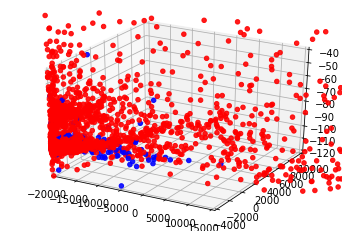

In [6]:
colors = ['blue' if l else 'red' for l in y]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_X[0], transformed_X[1], transformed_X[2], c=colors)
ax.set_xlim(-20000, 15000)
ax.set_ylim(-4000, 10000)
ax.set_zlim(-120, -40)
plt.show()

Para visualizar a fronteira entre pontos negativos e positivos, os gráficos abaixo relacionam as características tomadas em pares. Os gráficos utilizam a mesma escala anterior, para visualizar somente os pontos negativos muito próximos aos positivos.

Podemos ver que há uma separação clara entre positivos e negativos, mas sua fronteira não é tão bem definida. Por isso, podemos afirmar que não são linearmente separáveis.

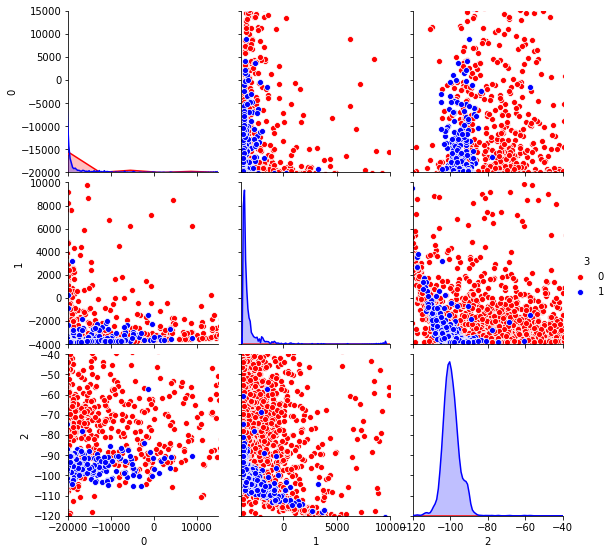

In [7]:
import seaborn as sb

transformed_data = transformed_X.copy()
transformed_data[3] = y
g = sb.pairplot(transformed_data, hue=3, palette=['red', 'blue'])

g.axes[0, 0].set_ylim(-20000, 15000)
g.axes[1, 0].set_ylim(-4000, 10000)
g.axes[2, 0].set_ylim(-120, -40)

g.axes[1, 0].set_xlim(-20000, 15000)
g.axes[1, 1].set_xlim(-4000, 10000)
g.axes[1, 2].set_xlim(-120, -40)

plt.show()

## Treinamento de modelos

Agora que conhecemos melhor o conjunto de dados disponível, podemos tentar a utilizar os algoritmos sugeridos na especificação para produzir classificadores. Abaixo se encontram algumas funções úteis para realizar o treinamento dos modelos. Para cada modelo, queremos:

- Normalização dos dados
- Acurácia do modelo
- Validação cruzada com 5 folds, e acurácias para cada fold
- Desvio padrão da acurácia para cada fold na validação cruzada

Para não haver vazamento de dados na validação cruzada, a normalização é feita a cada vez que os dados de treino são particionados, garantido pelo uso de pipelines do scikit learn.

Aqui, **não** será utilizado PCA para redução de dimensões do conjunto de dados. PCA foi utilizado somente para visualização.

A seleção de modelos terá como critério a acurácia, desempatando pelo desvio padrão das acurácias na validação cruzada. O primeiro critério servirá para medir a performance do modelo, e o segundo para verificar a consistência da performance na validação cruzada.

**Valores para hiper-parâmetros**

Alguns algoritmos demandam valores numéricos para hiper-parâmetros. A estratégia geral para escolha dos valores é variar em potências de 10, començando com 1. Paramos o aumento do parâmetro quando a performance é degradada devido à overfitting.

A partir dessa variação inicial, teremos valores para as piores performances. Com estes valores, o melhor valor é procurado no intervalo, através de busca binária.

Quando disponível, não definir um limite. Se este modelo tiver performance superior à maior encontrada para valores fixos, este modelo é escolhido.

Os outros hiper-parâmetros de cada algoritmo foram mantidos com os valores padrão da biblioteca.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def run_classifier(classifier):
    pipe = make_pipeline(    
        StandardScaler(),
        classifier
    )

    X, y, X_train, X_test, y_train, y_test = load_koi_data()
    
    cross_val_score_result = pd.DataFrame(cross_val_score(pipe, X_train, y_train, scoring='accuracy'))
    
    pipe.fit(X_train, y_train)
    
    accuracy_score_result = accuracy_score(pipe.predict(X_test), y_test)

    return pipe, cross_val_score_result, accuracy_score_result

In [9]:
from sklearn.metrics import plot_roc_curve

def plot_roc_for_pipes(pipes_and_labels):
    ax = plt.gca()
    X, y, X_train, X_test, y_train, y_test = load_koi_data()
    for pipes_and_labels in pipes_and_labels:
        pipe, label = pipes_and_labels
        plot_roc_curve(pipe, X_test, y_test, ax=ax, name=label)
    plt.show()

In [10]:
def compare_classifiers(classifiers_and_labels):
    pipes_and_labels = []
    classifiers_info = pd.DataFrame()

    for classifier_and_label in classifiers_and_labels:
        classifier, label = classifier_and_label
        pipe, cross_val_score_result, accuracy_score_result = run_classifier(classifier)
        classifier_info = pd.DataFrame([str(accuracy_score_result), str(np.std(cross_val_score_result.values))])
        classifier_info = pd.concat([classifier_info, cross_val_score_result])
        classifier_info.columns = [label]
        classifiers_info = pd.concat([classifiers_info, classifier_info], axis=1)
        pipes_and_labels.append((pipe, label))

    classifiers_info.index = ['Acurácia', 'CV - Desvio Padrão', 'CV - Fold 1', 'CV - Fold 2', 'CV - Fold 3', 'CV - Fold 4', 'CV - Fold 5']
    display(classifiers_info)

    plot_roc_for_pipes(pipes_and_labels)

    return pipes_and_labels

### Naive Bayes

Aqui treinamos um modelo com o algoritmo Gaussian Naive Bayes, que servirá de baseline para a performance dos outros modelos. O Naive Bayes assume independência condicional para cada par de features.

,Naive Bayes
Acurácia,0.9185242121445042
CV - Desvio Padrão,0.004627379627635902
CV - Fold 1,0.914213
CV - Fold 2,0.907692
CV - Fold 3,0.921795
CV - Fold 4,0.916667
CV - Fold 5,0.912821


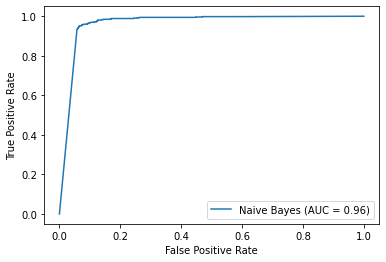

In [11]:
from sklearn.naive_bayes import GaussianNB

nb_pipes_and_labels = compare_classifiers([(GaussianNB(), 'Naive Bayes')])

baseline_nb_pipes_and_labels = nb_pipes_and_labels[0]

### Decision Tree

O algoritmo Decision Tree foi utilizado para treinar modelos, usando diferentes valores para o hiper-parâmetro "Altura Máxima", com estratégia geral descrita anteriormente.

Para altura máxima 1, podemos ver que a capacidade baixa do modelo foi o motivo para a baixa acurácia. Com capacidade baixa, o modelo não generaliza bem o suficiente para os dados de teste Aumentando a capacidade, podemos ver que a acurácia é melhorada. As acurácias do modelo para os hiperparâmetros 100 e ilimitado são bem próximas, pois podemos ver que as alturas das árvores geradas são a mesma.

Para Árvores de Decisão, o modelo selecionado é o "Decision Tree - Altura 10", por ter maior acurácia.

,Decision Tree - Altura 1,Decision Tree - Altura 10,Decision Tree - Altura 100,Decision Tree - Altura Ilimitada
Acurácia,0.7163720215219063,0.95695618754804,0.9515757109915449,0.9477325134511914
CV - Desvio Padrão,0.010585057995133708,0.00291267106494367,0.0050890044008582045,0.004945249442257085
CV - Fold 1,0.704225,0.951344,0.948784,0.946223
CV - Fold 2,0.719231,0.957692,0.957692,0.955128
CV - Fold 3,0.712821,0.953846,0.946154,0.951282
CV - Fold 4,0.735897,0.95641,0.95,0.957692
CV - Fold 5,0.712821,0.95,0.942308,0.944872


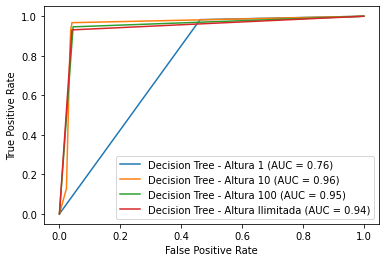

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_pipes_and_labels = compare_classifiers([
    (DecisionTreeClassifier(max_depth=1, criterion='entropy'), 'Decision Tree - Altura 1'),
    (DecisionTreeClassifier(max_depth=10, criterion='entropy'), 'Decision Tree - Altura 10'),
    (DecisionTreeClassifier(max_depth=100, criterion='entropy'), 'Decision Tree - Altura 100'),
    (DecisionTreeClassifier(criterion='entropy'), 'Decision Tree - Altura Ilimitada')
])

In [13]:
for dt_pipe_and_label in dt_pipes_and_labels:
    dt_pipe, label = dt_pipe_and_label
    print('Altura da árvore para "' + label + '": ' + str(dt_pipe[1].get_depth()))

Altura da árvore para "Decision Tree - Altura 1": 1
Altura da árvore para "Decision Tree - Altura 10": 10
Altura da árvore para "Decision Tree - Altura 100": 16
Altura da árvore para "Decision Tree - Altura Ilimitada": 16


In [14]:
selected_dt_pipe_and_label = dt_pipes_and_labels[1]

### SVM

Aqui, foi utilizado o algoritmo SVM, variando os modelos para os diferentes kernels disponívels. A performance dos modelos será diferente para cada kernel, pois na tentativa de separar dados não linearmente separáveis, os kernels transformam os dados de maneira diferente.

Podemos ver que o modelo utilizando kernel linear se sai melhor que os outros, com maior acurácia. A transformação de outros kernels deve prejudicar a separação, tendo resultados até mesmo piores que o Naive Bayes.

,SVM - Kernel linear,SVM - Kernel sigmoid,SVM - Kernel polinomial,SVM - Kernel RBF
Acurácia,0.9584934665641814,0.830130668716372,0.8677940046118371,0.9346656418139893
CV - Desvio Padrão,0.005908301786025537,0.017279440613783045,0.004975755257478962,0.0036779980301429416
CV - Fold 1,0.941101,0.852753,0.873239,0.934699
CV - Fold 2,0.948718,0.870513,0.870513,0.934615
CV - Fold 3,0.948718,0.824359,0.880769,0.929487
CV - Fold 4,0.942308,0.832051,0.865385,0.935897
CV - Fold 5,0.957692,0.860256,0.873077,0.941026


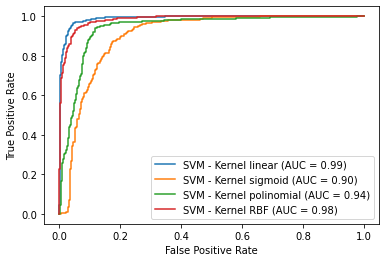

In [15]:
from sklearn.svm import SVC

svm_pipes_and_labels = compare_classifiers([
    (SVC(kernel='linear'), 'SVM - Kernel linear'),
    (SVC(kernel='sigmoid'), 'SVM - Kernel sigmoid'),
    (SVC(kernel='poly'), 'SVM - Kernel polinomial'),
    (SVC(kernel='rbf'), 'SVM - Kernel RBF')
])

In [16]:
selected_svm_pipe_and_label = svm_pipes_and_labels[0]

### k-NN

Podemos observar que novamente o modelo de capacidade baixa (1 vizinho) não generaliza bem (underfitting), tendo a pior acurácia, e tendo performance pior que o baseline (Naive Bayes). Observamos performance ainda pior para o modelo com capacidade alta (100 vizinho), causando overfitting.

O modelo de capacidade intermediária (10 vizinhos) possui acurácia equivalente ao modelo de capacidade baixa. Podemos concluir que o algoritmo k-NN não é bom para este conjunto de dados. Selecionaremos o modelo com 10 vizinhos, com menor desvio padrão no CV, para efeitos de comparação com os outros algoritmos.

,k-NN - 1 vizinho,k-NN - 10 vizinhos,k-NN - 100 vizinhos
Acurácia,0.8785549577248271,0.8931591083781706,0.8293620292083013
CV - Desvio Padrão,0.005795071129776541,0.0046501592331482855,0.005109471037525336
CV - Fold 1,0.891165,0.884763,0.814341
CV - Fold 2,0.880769,0.882051,0.823077
CV - Fold 3,0.875641,0.888462,0.826923
CV - Fold 4,0.879487,0.880769,0.814103
CV - Fold 5,0.888462,0.89359,0.816667


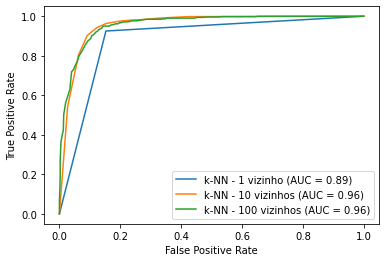

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipes_and_labels = compare_classifiers([
    (KNeighborsClassifier(n_neighbors=1), 'k-NN - 1 vizinho'),
    (KNeighborsClassifier(n_neighbors=10), 'k-NN - 10 vizinhos'),
    (KNeighborsClassifier(n_neighbors=100), 'k-NN - 100 vizinhos')
])

In [18]:
selected_knn_pipe_and_label = knn_pipes_and_labels[1]

### Random Forest

Para os modelos gerados com algoritmo Random Forest, podemos ver a influência da baixa capacidade dos modelos com 1 árvore e 10 árvores na performance, tendo os menores valores para acurácia, mas ainda sendo maiores que o baseline Naive Bayes. Aumentando a capacidade, obtemos modelos com capacidade superior, porém não foi observado aumento de acurácia significativo com o aumento para 1000 árvores. Assim, utilizando o desvio padrão como desempate, escolhemos o modelo com 1000 árvores para efeitos de comparação.

,Random Forest - 1 árvore,Random Forest - 10 árvores,Random Forest - 100 árvores,Random Forest - 1000 árvores
Acurácia,0.9538816295157571,0.9638739431206764,0.9692544196771714,0.9746348962336664
CV - Desvio Padrão,0.016140766539137687,0.008542756685216995,0.005813607782125931,0.005931373548879646
CV - Fold 1,0.90653,0.961588,0.96799,0.965429
CV - Fold 2,0.952564,0.961538,0.965385,0.969231
CV - Fold 3,0.911538,0.960256,0.969231,0.970513
CV - Fold 4,0.924359,0.975641,0.976923,0.978205
CV - Fold 5,0.929487,0.948718,0.958974,0.960256


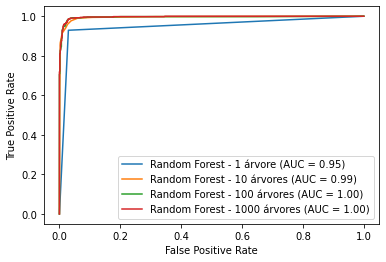

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf_pipes_and_labels = compare_classifiers([
    (RandomForestClassifier(n_estimators=1), 'Random Forest - 1 árvore'),
    (RandomForestClassifier(n_estimators=10), 'Random Forest - 10 árvores'),
    (RandomForestClassifier(n_estimators=100), 'Random Forest - 100 árvores'),
    (RandomForestClassifier(n_estimators=1000), 'Random Forest - 1000 árvores'),
])

In [20]:
selected_rf_pipe_and_label = rf_pipes_and_labels[3]

### Gradient Tree Boosting

Neste, temos resultados interessantes. Os modelos encontrados para os diferentes valores de iterações tem resultados muito parecidos para acurácia. Uma possível explicação é que o algoritmo não consegue melhorar sua performance em iterações adicionais após identificar que não há mais ganho. A seleção aqui será baseada somente no desvio padrão para o cross-validation. Por isso, selecionamos o modelo Gradient Tree Boosting - Sem limite de iterações.

,Gradient Tree Boosting - 1 iteração,Gradient Tree Boosting - 10 iterações,Gradient Tree Boosting - 100 iterações,Gradient Tree Boosting - Sem limite de iterações
Acurácia,0.9684857801691007,0.9754035357417371,0.9700230591852421,0.9707916986933128
CV - Desvio Padrão,0.0037415726726336453,0.004614941942904242,0.004312405039541708,0.0031741499584601314
CV - Fold 1,0.961588,0.966709,0.964149,0.965429
CV - Fold 2,0.961538,0.962821,0.965385,0.969231
CV - Fold 3,0.965385,0.969231,0.975641,0.973077
CV - Fold 4,0.971795,0.974359,0.970513,0.969231
CV - Fold 5,0.965385,0.961538,0.965385,0.964103


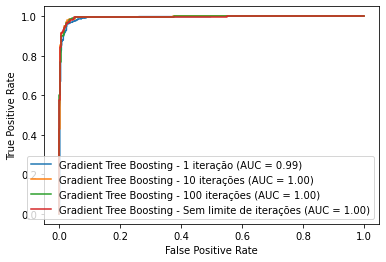

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipes_and_labels = compare_classifiers([
    (GradientBoostingClassifier(n_iter_no_change=1), 'Gradient Tree Boosting - 1 iteração'),
    (GradientBoostingClassifier(n_iter_no_change=10), 'Gradient Tree Boosting - 10 iterações'),
    (GradientBoostingClassifier(n_iter_no_change=100), 'Gradient Tree Boosting - 100 iterações'),
    (GradientBoostingClassifier(), 'Gradient Tree Boosting - Sem limite de iterações'),
])

In [22]:
selected_gb_pipe_and_label = gb_pipes_and_labels[3]

### Escolha final

,Decision Tree - Altura 10,SVM - Kernel linear,k-NN - 10 vizinhos,Random Forest - 1000 árvores,Gradient Tree Boosting - Sem limite de iterações
Acurácia,0.95695618754804,0.9584934665641814,0.8931591083781706,0.9746348962336664,0.9707916986933128


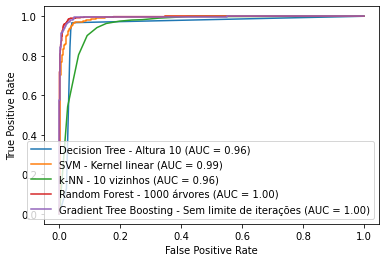

In [23]:
selected_pipes_and_labels = [
    selected_dt_pipe_and_label,
    selected_svm_pipe_and_label,
    selected_knn_pipe_and_label,
    selected_rf_pipe_and_label,
    selected_gb_pipe_and_label,
]

X, y, X_train, X_test, y_train, y_test = load_koi_data()
selected_pipes_info = pd.DataFrame()

for selected_pipe_and_label in selected_pipes_and_labels:
    selected_pipe, label = selected_pipe_and_label
    accuracy_score_result = accuracy_score(selected_pipe.predict(X_test), y_test)
    selected_pipe_info = pd.DataFrame([str(accuracy_score_result)])
    selected_pipe_info.columns = [label]
    selected_pipes_info = pd.concat([selected_pipes_info, selected_pipe_info], axis=1)
selected_pipes_info.index = ['Acurácia']
display(selected_pipes_info)
plot_roc_for_pipes(selected_pipes_and_labels)

A escolha final é pelo modelo gerado a partir do algoritmo Random Forest - 100 árvores, devido à maior acurácia se comparado aos outros modelos observados.

**Nota**: Percebe-se que para os mesmos treinamentos em execuções diferentes, os valores utilizados para comparações de performance variam, mas a diferença foi julgada não significativa. Porém, caso queira acesso aos valores vistos por mim durante a análise, acesse o link a seguir: https://drive.google.com/file/d/1YZ9yUOcjJ_g-JQB905K1JNetnuHyLLoH/view?usp=sharing

## Referências

- Documentação do Scikit Learn
- Documentação do Pandas
- Documentação do Numpy
- Documentação do Matplotlib
- Documentação do Seaborn